In [6]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, neighbors, metrics, datasets

In [4]:
# Importing the dataset

dataset = datasets.load_iris()
print(dir(dataset))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [8]:
# Transforming into a dataframe

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df0 = df[df['target'] == 0]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df1 = df[df['target'] == 1]
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [12]:
df2 = df[df['target'] == 2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


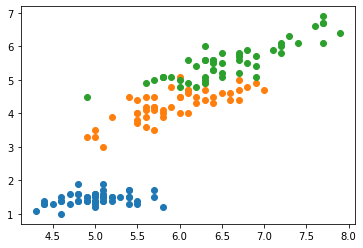

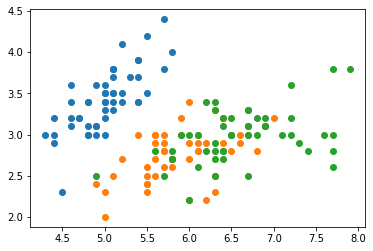

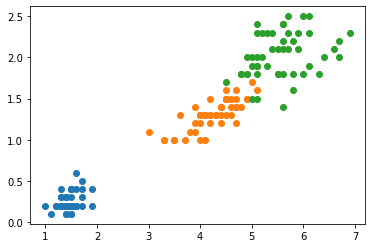

In [48]:
# Visualizing the classification categories

plt.scatter(df0['sepal length (cm)'], df0['petal length (cm)'])
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'])
plt.scatter(df2['sepal length (cm)'], df2['petal length (cm)'])
plt.show()

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'])
plt.show()

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'])
plt.show()

In [14]:
# Splitting the data into training and testing data

X = df.drop('target', axis = 1).values
y = df['target'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [40]:
# Fitting the data and training the model

model = neighbors.KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
# Checking the accuracy of the model -> changes with change of 'k' (paramter tuning)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))  

1.0


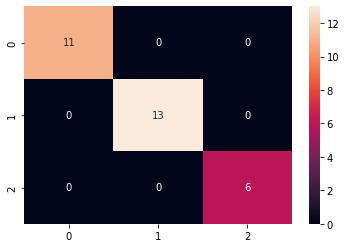

In [43]:
# Plotting the confusion matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

